# Background + hypothesis

The House Prices dataset contains information about residential homes in Ames, Iowa, including 79 features that describe various aspects of the properties, such as size, location, and condition. The goal of this project is to predict the sale price of a house based on these features. This is a regression problem, and the performance metric is the Root Mean Squared Error (RMSE) between the logarithm of the predicted price and the logarithm of the observed price.

Understanding the factors that influence house prices is important for both buyers and sellers. For buyers, it helps in making informed decisions to give reasonable purchase offers, while for sellers, it provides insights into how to increase the value of their property and sell at a higher price. This analysis will explore the dataset to identify key features that are strongly related to the sale price and provide insights into the housing market.


I hypothesize that houses with bigger above grade (ground) living area square feet will have higher sale prices. Because the coefficient of above grade (ground) living area square feet is second highest (0.7), which means houses with bigger ground living area can have higher house prices in the market. Larger homes typically offer more space and amenities, making them more desirable to buyers.
I hypothesize that houses with higher overall material and finish quality will have higher sale prices. Because the coefficient of overall material and finish quality is the biggest(0.79), which means houses with excellent finish condition and material can have higher house prices in the market. When a house was built with expensive materials and in good conditions, which means this house has higher building cost and can sell at a competitive price.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn import model_selection, linear_model, metrics
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor


print("Libraries loaded successfully!")

Libraries loaded successfully!


In [57]:
#Owen's code 

#Load the training data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#Check the first few rows of the dataset
print("Head")
print(train.head())
print("__________________________________________")

#Check data types and basic info
print("Basic Info")
print("__________________________________________")
train.info()

#Check for missing values
print("__________________________________________")
print("Missing Values")
print(train.isnull().sum())


Head
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        

# Creating Data visualizations

According to this histogram, most houses' sale prices are between 100K and 175K.

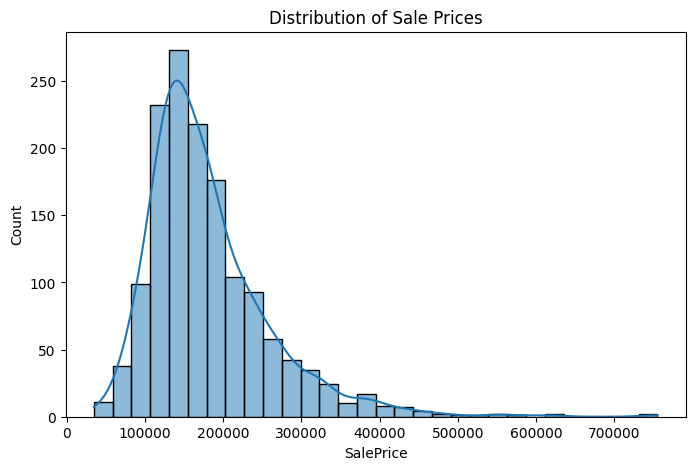

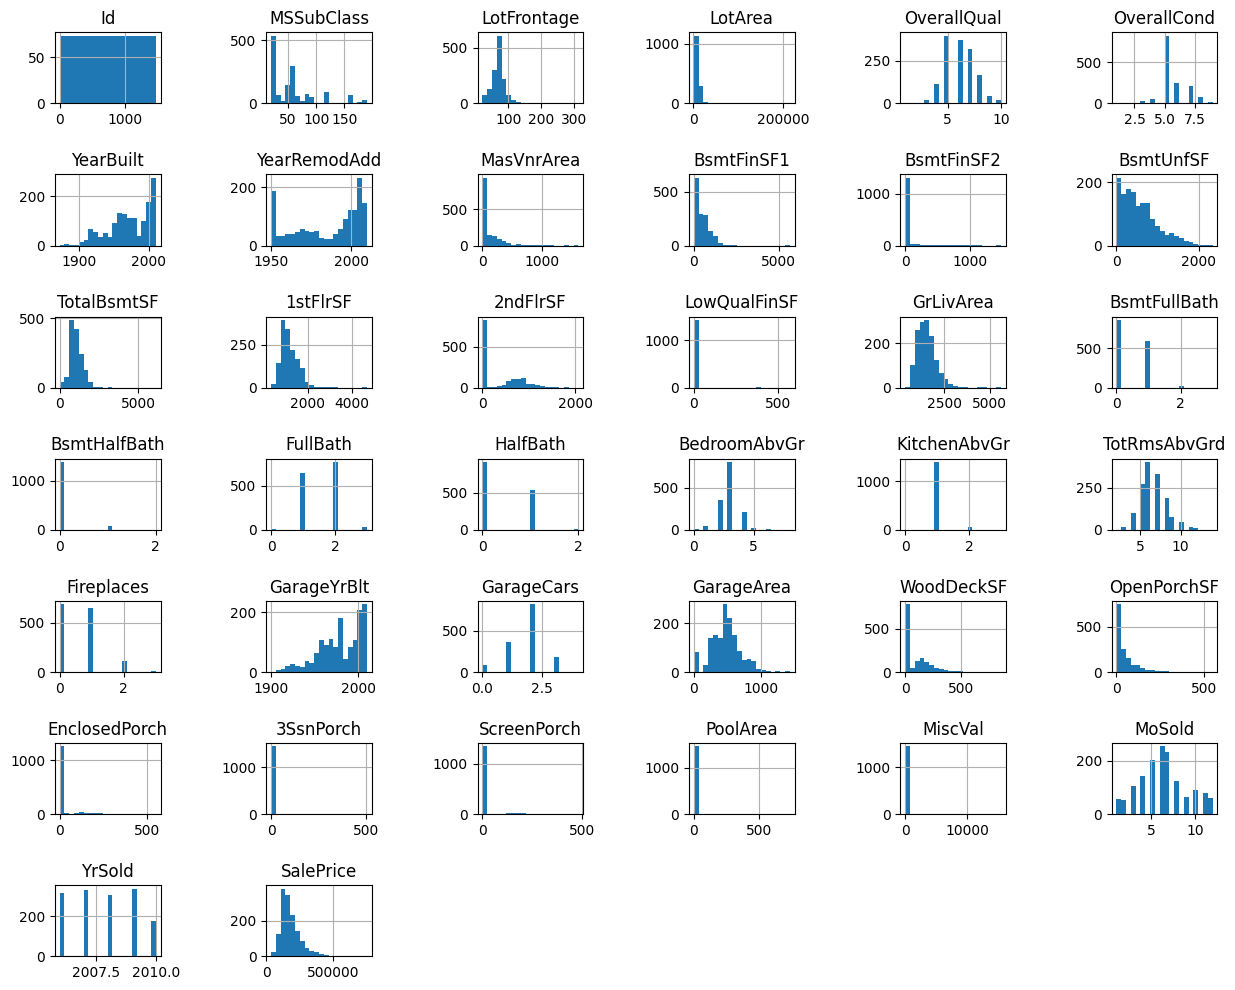

In [3]:
# 1. Plot histogram for SalePrice

plt.figure(figsize=(8,5)) 
# Set the figure size

sns.histplot(train['SalePrice'], kde=True, bins=30)
# Plot the historgram with KDE(Kernal Density Estimate)

plt.title('Distribution of Sale Prices') 
# Add title to the plot

plt.show() # Display the plot

# 2. Plot histograms for numeric features
num_features = train.select_dtypes(include=['int64', 'float64']).columns 
# Select numeric columns

train[num_features].hist(figsize=(15,12), bins=20)
# Plot histograms for all numeric columns
plt.subplots_adjust(hspace=1, wspace=1)# Increase vertical (hspace) and horizontal (wspace) spacing
plt.show() # Display the plot

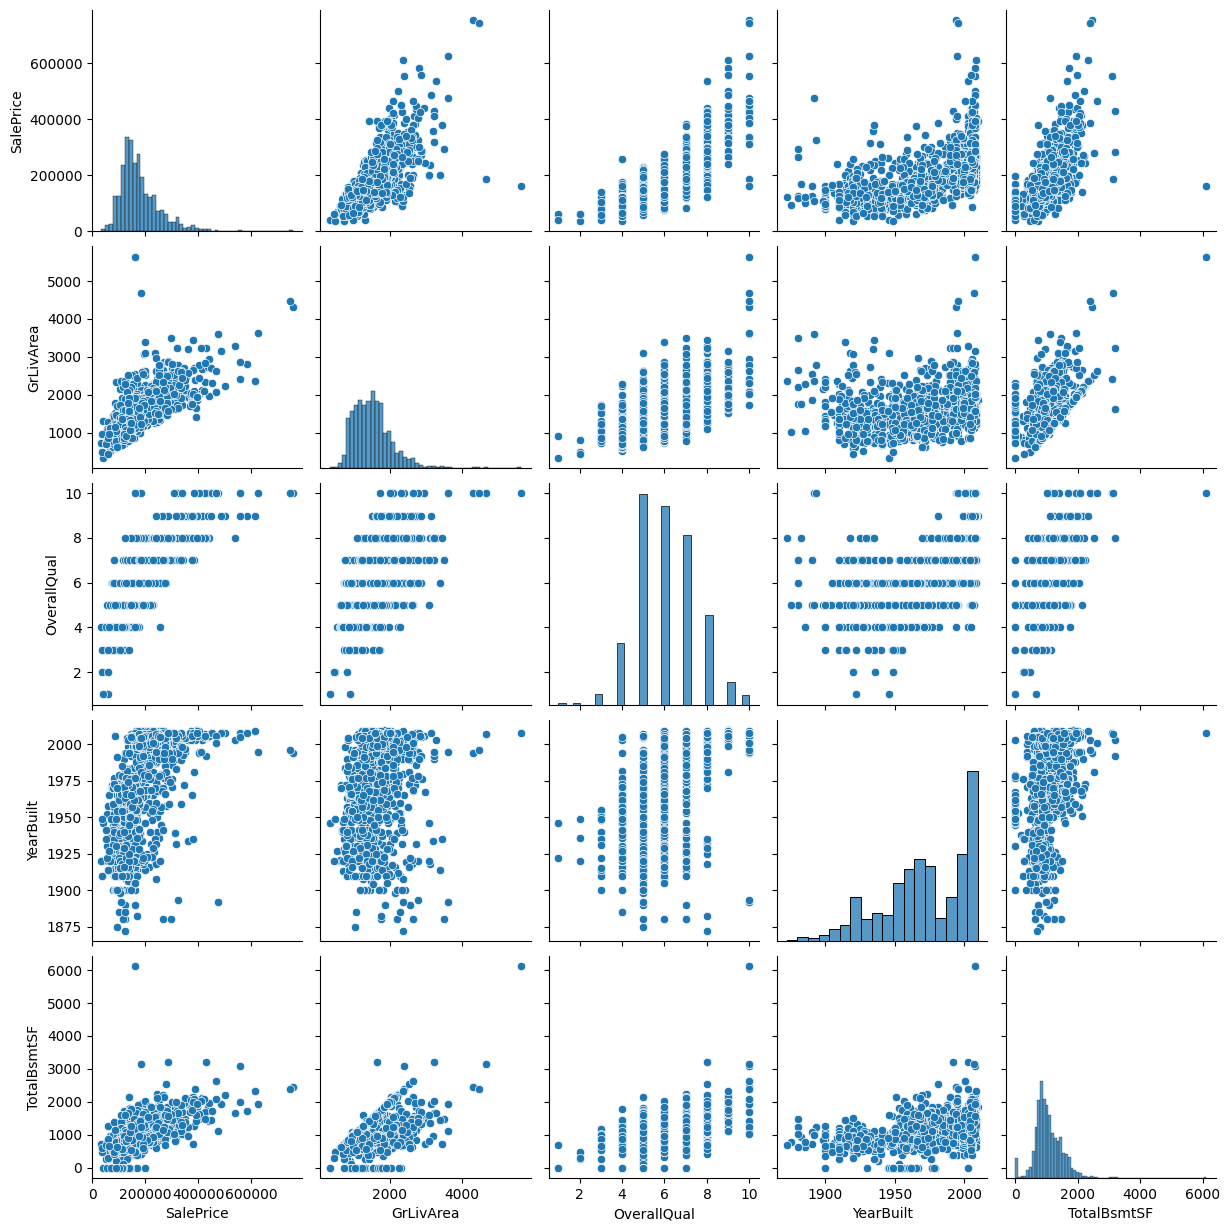

In [4]:

# Selecting a smaller subset of features for the pairplot
selected_features = ['SalePrice', 'GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']

# Pairplot using a subset of train data
sns.pairplot(train[selected_features])
plt.show()


# Handling missing values

This doesn't change values in the file. It only affects the data in memory because we used "pd.read_csv" which only makes a copy of the train dataset.

In [59]:
#Handling Missing Values (New)
train['Alley'].fillna('No', inplace=True)
test['Alley'].fillna('No', inplace=True)
train['Fence'].fillna('No', inplace=True)
test['Fence'].fillna('No', inplace=True)
train['MasVnrType'].fillna('No', inplace=True)
test['MasVnrType'].fillna('No', inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)
train['FireplaceQu'].fillna('No', inplace=True)
test['FireplaceQu'].fillna('No', inplace=True)
train['LotFrontage'].fillna(0, inplace=True)
test['LotFrontage'].fillna(0, inplace=True)
train['GarageCond'].fillna('No', inplace=True)
test['GarageCond'].fillna('No', inplace=True)
train['GarageType'].fillna('No', inplace=True)
test['GarageType'].fillna('No', inplace=True)
train['GarageFinish'].fillna('No', inplace=True)
test['GarageFinish'].fillna('No', inplace=True)
train['GarageQual'].fillna('No', inplace=True)
test['GarageQual'].fillna('No', inplace=True)
train['BsmtFinType2'].fillna('Unf', inplace=True)
test['BsmtFinType2'].fillna('Unf', inplace=True)
train['BsmtQual'].fillna('No', inplace=True)
test['BsmtQual'].fillna('No', inplace=True)
train['BsmtCond'].fillna('No', inplace=True)
test['BsmtCond'].fillna('No', inplace=True)
train['BsmtFinType1'].fillna('Unf', inplace=True)
test['BsmtFinType1'].fillna('Unf', inplace=True)
train['Electrical'].fillna('SBrkr', inplace=True)
test['Electrical'].fillna('SBrkr', inplace=True)
train['BsmtExposure'].fillna('No', inplace=True)
test['BsmtExposure'].fillna('No', inplace=True)

# Handling missing values
for column in train.columns:
    if train[column].dtype == 'O':  # Check if the column is categorical
        train[column].fillna(train[column].mode()[0], inplace=True)  # Fill with mode
    else:  # Numerical column
        train[column].fillna(train[column].mean(), inplace=True)  # Fill with mean

# Save the modified dataset back to a CSV file
train.to_csv('train.csv', index=False)

print("Updated dataset saved as 'train.csv'.")

# Display updated dataset
print("Updated Dataset with Missing Values Handled:")
print(train.head())

# Check for any remaining missing values
missing_values = train.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("No missing values left in the dataset.")
else:
    print("Columns with missing values:")
    print(missing_values)


# Calculating correlation

Strength of correlation: Correlation is measured using a coefficient, typically between -1 and +1. A value close to +1 or -1 indicates a strong correlation, while a value close to 0 indicates a weak or no correlation. For example, OverallQual has a high positive correlation, meaning higher quality houses tend to have higher prices. 

In [6]:
# Fix: Perform operations only on numeric columns
numerical_data = train.select_dtypes(include=[np.number])

# Compute mean, median, and standard deviation
mean_values = numerical_data.mean()
median_values = numerical_data.median()
std_values = numerical_data.std()

# Display results
print("mean results:\n",mean_values) # Display mean values
print("median results:\n",median_values) # Display median values
print("standard deviation results:\n",std_values) # Display standard deviation values

mean results:
 Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.

In [7]:
# The error suggests that there is a mix of numeric and non-numeric types in the DataFrame.
# We should select only numeric columns for filling missing values with their mean values.

# Fixing the code for missing values
numeric_cols = train.select_dtypes(include=['number']).columns
train[numeric_cols].fillna(train[numeric_cols].mean(), inplace=True)

# Checking if the missing values in numeric columns have been successfully filled
print(train[numeric_cols].isnull().sum())
#0 means no missing values

#fix missing values in categorical columns

categorical_cols = train.select_dtypes(include=['object']).columns
train[categorical_cols].fillna(train[categorical_cols].mode().iloc[0], inplace=True)

# Checking if the missing values in categorical columns have been successfully filled
print(train[categorical_cols].isnull().sum())

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0

In [8]:
#mengting's code
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set(style="whitegrid")
# Load the training data from a CSV file
#train_df = pd.read_csv('train.csv')
# Inspect the first few rows of the dataset
#print(train_df.head())

# Perform the data visualizations (using the training dataset)
# For example, plot the distribution of SalePrice
#plt.figure(figsize=(12,6))
#sns.histplot(train_df['SalePrice'], kde=True, color='blue', bins=30)
#plt.title('Distribution of SalePrice in Training Data')
#plt.show()

# Correlation heatmap for training data
#corr_matrix = train_df.corr()
#plt.figure(figsize=(12,10))
#sns.heatmap(corr_matrix[['SalePrice']], annot=True, cmap='coolwarm', fmt='.2f')
#plt.title('Correlation Heatmap of Features with SalePrice (Training Data)')
#plt.show()

In [61]:
# Calculate the correlation matrix
numeric_columns = train.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_columns.corr()

# Display the correlation matrix
#print(corr_matrix)

# Get the correlation of each feature with 'SalePrice'
corr_with_target = corr_matrix['SalePrice']

# Sort the correlations in descending order
corr_with_target_sorted = corr_with_target.sort_values(ascending=False)

# Display the sorted correlations
print(corr_with_target_sorted)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
LotFrontage      0.209624
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

# Looking at the data types

In [63]:
#Different Data Types int64, float64, object
integer_numbers = train.select_dtypes(include=['int64'])
float_numbers = train.select_dtypes(include=['float64'])
objects = train.select_dtypes(include=['object'])

print("Integer numbers:\n", integer_numbers)
print("___________________________")
print("Float numbers:\n", float_numbers)
print("___________________________")
print("Objects:\n", objects)

Integer numbers:
         Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
0             2003         706           0 

# Feature Engineering & Creating New Features

Feature engineering is the process of creating new features or transforming existing ones to better represent the underlying problem.

In [65]:
#Creating new features for train set


#Creating a new feature 'HouseAge' by subtracting 'YearBuilt' from 'YrSold'
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

#Creating a new feature 'HouseRemodelAge' by subtracting 'YearRemodAdd' from 'YrSold'
train['HouseRemodelAge'] = train['YrSold'] - train['YearRemodAdd']

#Creating a new feature 'TotalBathrooms' by combining 'FullBath' and 'HalfBath'
train['TotalBathrooms'] = train['BsmtFullBath'] + train['FullBath'] + 0.5 * (train['HalfBath'] + train['BsmtHalfBath'])
#0.5 is used to count half bathrooms as a bathroom

#Creating a new feature 'HasPool' to indicate whether the house has a pool
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
#.apply applies a function to each value in the column(0 no pool and 1 for pool)

#Creating a new feature 'TotalPorchSF' by combining all porch-related features
train['TotalPorchSF'] = train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch'] + train['WoodDeckSF']

#Creating a new feature 'TotalSF' by combining '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', and 'BsmtFinSF2'
train['TotalSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['BsmtFinSF1'] + train['BsmtFinSF2']

#Creating a new feature 'TotalArea' by combining 'GrLivArea' and 'TotalBsmtSF'
train['TotalArea'] = train['GrLivArea'] + train['TotalBsmtSF']

#Drop the old columns
train = train.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])


# Display the first 5 rows of the training set with the new features
print(train[['HouseAge', 'HouseRemodelAge', 'TotalBathrooms', 'HasPool', 'TotalPorchSF', 'TotalSF', 'TotalArea']].head())


   HouseAge  HouseRemodelAge  TotalBathrooms  HasPool  TotalPorchSF  TotalSF  \
0         5                5             3.5        0            61     2416   
1        31               31             2.5        0           298     2240   
2         7                6             3.5        0            42     2272   
3        91               36             2.0        0           307     1933   
4         8                8             3.5        0           276     2853   

   TotalArea  
0       2566  
1       2524  
2       2706  
3       2473  
4       3343  


In [67]:

# Create new features for the test set
test['HouseAge'] = test['YrSold'] - test['YearBuilt']
test['HouseRemodelAge'] = test['YrSold'] - test['YearRemodAdd']
test['TotalBathrooms'] = test['BsmtFullBath'] + test['FullBath'] + 0.5 * (test['HalfBath'] + test['BsmtHalfBath'])
test['HasPool'] = test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test['TotalPorchSF'] = test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch'] + test['WoodDeckSF']
test['TotalSF'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['BsmtFinSF1'] + test['BsmtFinSF2']
test['TotalArea'] = test['GrLivArea'] + test['TotalBsmtSF']

# Drop unnecessary columns
test = test.drop(columns=['YrSold', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'TotalBsmtSF','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF'])

# Display the first 5 rows of the test set with the new features
print(test[['HouseAge', 'HouseRemodelAge', 'TotalBathrooms', 'HasPool', 'TotalPorchSF', 'TotalSF', 'TotalArea']].head())

   HouseAge  HouseRemodelAge  TotalBathrooms  HasPool  TotalPorchSF  TotalSF  \
0        49               49             1.0        0           260   1508.0   
1        52               52             1.5        0           429   2252.0   
2        13               12             2.5        0           246   2420.0   
3        12               12             2.5        0           396   2206.0   
4        18               18             2.0        0           226   1543.0   

   TotalArea  
0     1778.0  
1     2658.0  
2     2557.0  
3     2530.0  
4     2560.0  


# Normalize the value

Normalizing data improves model performance, prevents values from dominating others, and speeds up the convergence for algorithms

Additions: Normalize years by using 2025 compared the date

In [69]:
# Select only numeric columns
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns
numeric_data = train[numeric_columns]
#Issue with this is that, every numeric data is normalized which isn't what we want.

# List of continuous numerical features to normalize
continuous_features = [
    'OverallQual', 'TotalArea', 'TotalSF', 'GarageCars', 'TotalBathrooms', 
    'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea', 'TotalPorchSF', 'LotArea', 
    'BsmtUnfSF', 'BedroomAbvGr', 'LotFrontage', 'MoSold', 'PoolArea', 
    'HasPool', 'MiscVal', 'OverallCond', 'LowQualFinSF', 'MSSubClass', 
    'KitchenAbvGr'
]

non_numeric_cols = [col for col in continuous_features if col not in numeric_columns]
if non_numeric_cols:
    print(f"These columns are not numeric and will cause issues: {non_numeric_cols}")
else:
    print("All continuous features are numeric!")
    
zero_variance_cols = [col for col in continuous_features if train[col].nunique() == 1]
if zero_variance_cols:
    print(f"Columns with zero variance (no useful information): {zero_variance_cols}")
else:
    print("No zero variance columns detected.")

#select only continuous features
continuous_data = train[continuous_features]

# Reset the index to avoid misalignment
continuous_data_reset = continuous_data.reset_index(drop=True)

# Display the selected features values
print(continuous_data.head())


# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler() # Scales the values to a range of 0 and 1


# Fit and transform the numeric data
#min_max_scaled_data = min_max_scaler.fit_transform(numeric_data)
# Fit and transform the continuous data
min_max_scaled_data = min_max_scaler.fit_transform(continuous_data_reset)

if np.any(np.isnan(min_max_scaled_data)) or np.any(np.isinf(min_max_scaled_data)):
    print("Warning: The scaling resulted in NaN or infinite values!")
else:
    print("No NaN or infinite values after scaling.")

# Convert the scaled data back to a DataFrame
#min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=numeric_columns)
min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=continuous_features)
# 'columnns=numeric_columns' makes sure the columns are the same as the original

# Replace original numeric data with the scaled data
#train[numeric_columns] = min_max_scaled_df
#train dataframe now contains normalized data
train[continuous_features] = min_max_scaled_df
print("-----------------------")
print("min_max_scaled_data")
print(train[continuous_features].head())

#Display the first 5 rows of the scaled data
print("-----------------------")
print("min_max_scaled_df")
print(min_max_scaled_df.head())

#Display the first 5 rows of the train dataframe
print("-----------------------")
print(train.head())

print(train[continuous_features].shape, min_max_scaled_df.shape)

All continuous features are numeric!
No zero variance columns detected.
   OverallQual  TotalArea  TotalSF  GarageCars  TotalBathrooms  TotRmsAbvGrd  \
0            7       2566     2416           2             3.5             8   
1            6       2524     2240           2             2.5             6   
2            7       2706     2272           2             3.5             6   
3            7       2473     1933           3             2.0             7   
4            8       3343     2853           3             3.5             9   

   Fireplaces  MasVnrArea  TotalPorchSF  LotArea  ...  BedroomAbvGr  \
0           0       196.0            61     8450  ...             3   
1           1         0.0           298     9600  ...             3   
2           1       162.0            42    11250  ...             3   
3           1         0.0           307     9550  ...             3   
4           1       350.0           276    14260  ...             4   

   LotFrontage  MoSo

In [71]:
# Select the same continuous features in the test set
test_continuous_data = test[continuous_features]

# Use the SAME scaler (already fitted on training data) to transform the test set
# DO NOT refit the scaler on the test data!
test_min_max_scaled_data = min_max_scaler.transform(test_continuous_data)

# Convert the scaled test data back to a DataFrame
test_min_max_scaled_df = pd.DataFrame(test_min_max_scaled_data, columns=continuous_features)

# Replace original continuous features in the test set with the scaled data
test[continuous_features] = test_min_max_scaled_df

# Display the first 5 rows of the scaled test data
print("-----------------------")
print("Scaled Test Data (Continuous Features):")
print(test[continuous_features].head())

# Verify the scaling (values should be between 0 and 1)
print("\nTest Data Min (should be ~0):")
print(test[continuous_features].min().round(2))
print("\nTest Data Max (should be ~1):")
print(test[continuous_features].max().round(2))

-----------------------
Scaled Test Data (Continuous Features):
   OverallQual  TotalArea   TotalSF  GarageCars  TotalBathrooms  TotRmsAbvGrd  \
0     0.444444   0.126467  0.107195        0.25             0.0      0.250000   
1     0.555556   0.203538  0.175128        0.25             0.1      0.333333   
2     0.444444   0.194693  0.190467        0.50             0.3      0.333333   
3     0.555556   0.192328  0.170928        0.50             0.3      0.416667   
4     0.777778   0.194955  0.110391        0.50             0.2      0.250000   

   Fireplaces  MasVnrArea  TotalPorchSF   LotArea  ...  BedroomAbvGr  \
0    0.000000      0.0000      0.253165  0.048246  ...         0.250   
1    0.000000      0.0675      0.417722  0.060609  ...         0.375   
2    0.333333      0.0000      0.239533  0.058566  ...         0.375   
3    0.333333      0.0125      0.385589  0.040562  ...         0.375   
4    0.000000      0.0000      0.220058  0.017318  ...         0.250   

   LotFrontage  

In [15]:
print(train.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 'HouseAge', 'HouseRemodelAge', 'TotalBathrooms', 'HasPool', 'TotalPorchSF', 'TotalSF', 'TotalArea']


# Dropping Outlier Houses from Train Set

Outliers based on different features and it's correlation between SalePrice

In [73]:
values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 524, 739, 636, 1062, 1191, 496, 198, 1338]

train = train[train.Id.isin(values) == False]

train.drop(columns=['Id'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleType,SaleCondition,SalePrice,HouseAge,HouseRemodelAge,TotalBathrooms,HasPool,TotalPorchSF,TotalSF,TotalArea
0,0.235294,RL,0.207668,0.033420,Pave,No,Reg,Lvl,AllPub,Inside,...,WD,Normal,208500,5,5,0.5,0.0,0.059396,0.190102,0.195481
1,0.000000,RL,0.255591,0.038795,Pave,No,Reg,Lvl,AllPub,FR2,...,WD,Normal,181500,31,31,0.3,0.0,0.290166,0.174032,0.191802
2,0.235294,RL,0.217252,0.046507,Pave,No,IR1,Lvl,AllPub,Inside,...,WD,Normal,223500,7,6,0.5,0.0,0.040896,0.176954,0.207742
3,0.294118,RL,0.191693,0.038561,Pave,No,IR1,Lvl,AllPub,Corner,...,WD,Abnorml,140000,91,36,0.2,0.0,0.298929,0.146001,0.187336
4,0.235294,RL,0.268371,0.060576,Pave,No,IR1,Lvl,AllPub,FR2,...,WD,Normal,250000,8,8,0.5,0.0,0.268744,0.230004,0.263531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,RL,0.198083,0.030929,Pave,No,Reg,Lvl,AllPub,Inside,...,WD,Normal,175000,8,7,0.3,0.0,0.038948,0.119887,0.198459
1456,0.000000,RL,0.271565,0.055505,Pave,No,Reg,Lvl,AllPub,Inside,...,WD,Normal,210000,32,22,0.4,0.0,0.339825,0.245800,0.287353
1457,0.294118,RL,0.210863,0.036187,Pave,No,Reg,Lvl,AllPub,Inside,...,WD,Normal,266500,69,4,0.2,0.0,0.058423,0.208272,0.276581
1458,0.000000,RL,0.217252,0.039342,Pave,No,Reg,Lvl,AllPub,Inside,...,WD,Normal,142125,60,14,0.2,0.0,0.465433,0.166362,0.159573


# One-hot encoding

One-hot encoding converts categorical variables into a binary format (0 or 1 or True or False)

In [75]:
# Select only certain features
ohe_cols = ['HouseStyle', 'Heating', 'SaleType', 'MSZoning', 'Neighborhood', 'SaleCondition', 'MasVnrType']

#Old ohe cols
#['Street', 'LotConfig','Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
#'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd','MasVnrType','Foundation', 
#'Electrical',  'SaleType', 'MSZoning', 'SaleCondition', 'Heating', 'GarageType', 'RoofMatl']


#Turn these features into binary numbers
train_encoded = pd.get_dummies(train, columns=ohe_cols, drop_first=True, dtype=float)
test_encoded = pd.get_dummies(test, columns=ohe_cols, drop_first=True, dtype=float)
#drop_first removes one of the new columns to avoid redundancy
#dtype=float makes sure the data type is float

# Save original columns (includes engineered features)
original_columns = train.columns.tolist()
# Get OHE columns (new columns added during encoding)
ohe_features = train_encoded.columns.difference(original_columns).tolist()

test_encoded = test_encoded.reindex(columns=train_encoded.columns, fill_value=0)

# Replace train and test with the encoded versions
train = train_encoded
test = test_encoded

# Ordinal Encoding

In [77]:
# Define categorical features for ordinal encoding
ode_cols = ['BsmtQual', 'BsmtFinType1', 'CentralAir', 'Functional', 'FireplaceQu', 
    'GarageFinish', 'KitchenQual', 'BsmtExposure', 'HeatingQC', 'ExterQual']
    
#Old ode cols
#['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'BsmtQual', 
 #           'BsmtFinType1', 'CentralAir', 'Functional', 'FireplaceQu', 'GarageFinish', 
  #          'GarageQual', 'PavedDrive', 'ExterCond', 'KitchenQual', 'BsmtExposure', 
   #         'HeatingQC', 'ExterQual', 'BsmtCond']

# Apply ordinal encoding
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  
train[ode_cols] = ordinal_encoder.fit_transform(train[ode_cols])
test[ode_cols] = ordinal_encoder.transform(test[ode_cols])

In [19]:
train

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrType_BrkFace,MasVnrType_Stone
0,1,0.235294,0.150685,0.033420,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,0.000000,0.202055,0.038795,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,3,0.235294,0.160959,0.046507,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4,0.294118,0.133562,0.038561,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,0.235294,0.215753,0.060576,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.235294,0.140411,0.030929,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1456,1457,0.000000,0.219178,0.055505,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1457,1458,0.294118,0.154110,0.036187,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1458,1459,0.000000,0.160959,0.039342,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [20]:
train.dtypes[train.dtypes=='object']

Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
LotConfig       object
LandSlope       object
Condition1      object
Condition2      object
BldgType        object
RoofStyle       object
RoofMatl        object
Exterior1st     object
Exterior2nd     object
ExterCond       object
Foundation      object
BsmtCond        object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageQual      object
GarageCond      object
PavedDrive      object
PoolQC          object
Fence           object
MiscFeature     object
dtype: object

In [79]:
# Find missing columns in test set

dropped_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond','BsmtFinType2']
missing_in_test = [col for col in dropped_cols if col not in test.columns]
print("Missing in test:", missing_in_test)

# Find missing columns in train set
missing_in_train = [col for col in dropped_cols if col not in train.columns]
print("Missing in train:", missing_in_train)

Missing in test: []
Missing in train: []


# Dropping Unecessary Features

In [81]:
train = train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond','BsmtFinType2'])
test = test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond','BsmtFinType2'])
train = train.drop(columns=['GarageArea'])
test = test.drop(columns=['GarageArea'])

#Select only the features I want to use (engineered + OHE) for the models
engineered_features = [
    'HouseAge', 'HouseRemodelAge', 'TotalBathrooms', 'HasPool', 
    'TotalPorchSF', 'TotalSF', 'TotalArea'
]
#drop features from old ode/ohe
# Features to drop (commented out ones)
drop_cols = [
    'LotShape', 'LandContour', 'Utilities', 'LandSlope', 'GarageQual', 'PavedDrive', 
    'ExterCond', 'BsmtCond', 'Street', 'LotConfig', 'Condition1', 'Condition2', 'BldgType', 
    'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Electrical', 'GarageType', 'RoofMatl'
]

# Drop the columns from train that are in the drop_cols list
train = train.drop(columns=[col for col in drop_cols if col in train.columns])
test = test.drop(columns=[col for col in drop_cols if col in test.columns])

#combine engineered features with one-hot encoded features

selected_features = ohe_features + engineered_features + ode_cols

selected_features

['Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'MasVnrType_BrkFace',
 'MasVnrType_No',
 'MasVnrType_Stone',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'SaleCondition_AdjLand',
 'SaleCondition_Allo

# Train / Test Split

In [83]:
X= train.drop('SalePrice', axis=1)
y= train['SalePrice']
#target variable

#split the data into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
#initialize model
lr = LinearRegression()

#train the model on the training data
lr.fit(X_train, y_train)

#make predictions based on the validation set
y_pred_lr = lr.predict(X_val)

#evaluate the model using Root Mean Squared Error
rmse= mean_squared_error(y_val, y_pred_lr, squared=False)
print(f"Validation RMSE: {rmse:.2f}")

Validation RMSE: 23133.17


# Select Features

In [87]:
from sklearn.feature_selection import RFE
# Initialize model and RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features

# Fit RFE on training data
rfe.fit(train.drop(columns=["SalePrice"]), train["SalePrice"])

# Get selected features
selection_features = train.drop(columns=["SalePrice"]).columns[rfe.support_]
print("Selected Features:", selection_features)

Selected Features: Index(['LotArea', 'OverallQual', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'PoolArea', 'HasPool', 'TotalSF', 'TotalArea',
       'Heating_OthW'],
      dtype='object')


In [88]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb = XGBRegressor()
xgb.fit(train.drop(columns=["SalePrice"]), train["SalePrice"])

# Extract feature importance
features_importance = pd.Series(xgb.feature_importances_, index=train.drop(columns=["SalePrice"]).columns).sort_values(ascending=False)
print(features_importance.head(30))

OverallQual              0.443343
TotalArea                0.162174
MSZoning_RM              0.036348
GarageCars               0.033676
TotalBathrooms           0.030127
BsmtQual                 0.024831
CentralAir               0.023765
KitchenQual              0.019379
TotalSF                  0.017407
Neighborhood_Crawfor     0.017392
HouseAge                 0.014391
HouseRemodelAge          0.010999
Fireplaces               0.010674
OverallCond              0.009559
KitchenAbvGr             0.009204
Neighborhood_Somerst     0.007903
SaleType_WD              0.006340
ExterQual                0.006157
TotRmsAbvGrd             0.005502
FireplaceQu              0.005389
Neighborhood_StoneBr     0.005217
SaleCondition_Normal     0.004907
MSZoning_FV              0.004853
Functional               0.004725
HeatingQC                0.004698
MasVnrType_Stone         0.004290
SaleCondition_Partial    0.004011
LotArea                  0.003821
MasVnrType_BrkFace       0.003572
TotalPorchSF  

# Identify Evaluation Metrics

In [89]:
# Train a Linear Regression Model

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the Linear Regression model
rmse = mean_squared_error(y_val, y_pred_lr, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_val, y_pred_lr)  # Mean Absolute Error
r2 = r2_score(y_val, y_pred_lr)  # R-squared value

#how much the predicted values deviate from the actual values
#lower is better performance
print(f"Root Mean Squared Error (RMSE): {rmse}")  

#average absolute differences between actual and predicted values
print(f"Mean Absolute Error (MAE): {mae}")  

#how well the model explains the variance in the target variable
print(f"R-squared (R2): {r2}")
#1 = perfect fit
#0 = model performs no better than predicting the mean of target variable 
#<0 = model performs worse than predicting the mean of target variable

Root Mean Squared Error (RMSE): 23133.173039447578
Mean Absolute Error (MAE): 15665.913461187065
R-squared (R2): 0.8840981492929222


# Train a Baseline Model

In [90]:
#simple model used for comparisons
from sklearn.linear_model import LinearRegression
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_val)  # generates predicted values for the validation dataset

#Mean Absolute Error measures the average absolute differences between actual (y_val) and predicted (y_pred_baseline) values
print("Baseline MAE:", mean_absolute_error(y_val, y_pred_baseline))


Baseline MAE: 15665.913461187065


 This trains a baseline Linear Regression model and evaluates it using Mean Absolute Error (MAE)

Model predicts house pricing with a $25,364 error

# Train Advanced Models

In [91]:

from sklearn.ensemble import RandomForestRegressor

advanced_model = RandomForestRegressor(random_state=42) #(can add hyperparameters)
#max_depth = 20, min_samples_split = 2, n_estimators = 300, 

advanced_model.fit(X_train, y_train) 
#Get feature importance
feature_importance = pd.Series(advanced_model.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Save feature importances to a CSV file
feature_importance.to_csv('feature_importance.csv')

y_pred_advanced = advanced_model.predict(X_val)
print("Advanced Model MAE:", mean_absolute_error(y_val, y_pred_advanced))  #lower is better


Advanced Model MAE: 14622.76829861111


better predictor than regression model

# Evaluation and Comparison

In [92]:
#how well model explains % of variance
#higher is better
print("Baseline R-squared:", r2_score(y_val, y_pred_baseline))
print("Advanced Model R-squared:", r2_score(y_val, y_pred_advanced))  

Baseline R-squared: 0.8840981492929222
Advanced Model R-squared: 0.8989285776979311


1.0 -> perfect model

0.0 -> model no better than predicting mean 

<0 -> model worst than predicting mean

# Difference Between Training and Test Set

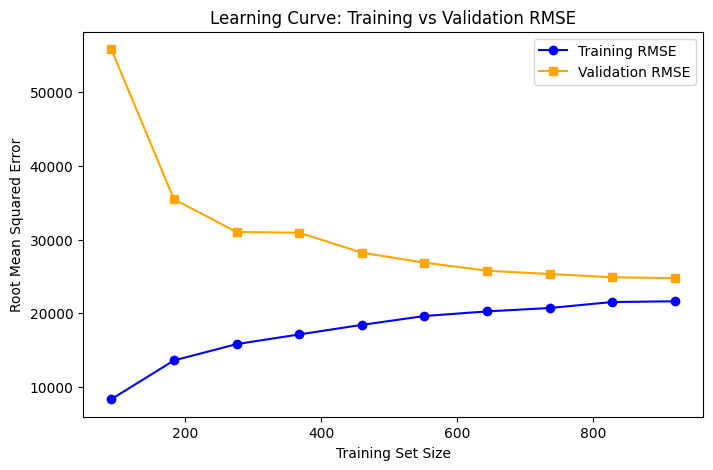

In [94]:
from sklearn.model_selection import learning_curve
#Predict on training and validation sets
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

#Calculate RMSE
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_val = mean_squared_error(y_val, y_val_pred,  squared=False)

# Plot RMSE for training and validation sets
# Generate learning curve
train_sizes, train_scores, val_scores = learning_curve(
    lr, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert negative RMSE back to positive values
train_rmse = -np.mean(train_scores, axis=1)
val_rmse = -np.mean(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, marker='o', label="Training RMSE", color="blue")
plt.plot(train_sizes, val_rmse, marker='s', label="Validation RMSE", color="orange")

plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error")
plt.title("Learning Curve: Training vs Validation RMSE")
plt.legend()
plt.show()

#Overfitting -> training RMSE is much lower than validation RMSE
#Underfitting-> Both training and validation RMSE are high and close together
#Good fit -> training and validation RMSE decrease and stabilize at similar values

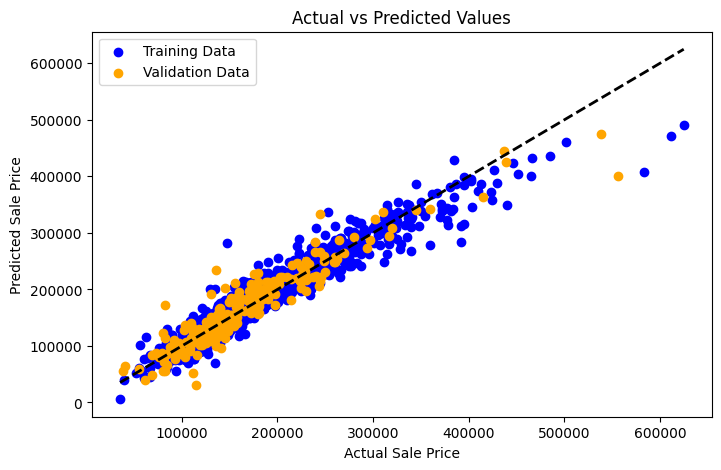

In [95]:
plt.figure(figsize=(8, 5))
plt.scatter(y_train, y_train_pred, color="blue", label="Training Data")
plt.scatter(y_val, y_val_pred, color="orange", label="Validation Data")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


# More Models

In [41]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Assuming X_train, X_val, y_train, y_val are already defined
# Example: X_train, X_val = train_test_split(X, test_size=0.2)

# Models to test
models = {
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Voting Regressor": VotingRegressor(estimators=[
        ('rf', RandomForestRegressor()), 
        ('xgb', XGBRegressor())
    ])
}

# Create a DataFrame to store results
results = pd.DataFrame(columns=["Model", "Train RMSE", "Validation RMSE"])

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate RMSE for both training and validation sets
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    # Store the results
    model_results = pd.DataFrame({
        "Model": [model_name],
        "Train RMSE": [train_rmse],
        "Validation RMSE": [val_rmse]
    })

     # Concatenate the new results with the existing DataFrame
    results = pd.concat([results, model_results], ignore_index=True)

# Display the results
print(results)


/tmp/ipykernel_40/3662931505.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, model_results], ignore_index=True)
              Model    Train RMSE  Validation RMSE
0  Ridge Regression  22909.937978     22876.386350
1     Random Forest   9187.847974     21912.767728
2           XGBoost   1075.509567     22290.140151
3     Decision Tree      0.000000     31260.971704
4  Voting Regressor   5031.592894     20987.068825


In [42]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Perform GridSearchCV
xgb_search = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_root_mean_squared_error')
xgb_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print("Best XGBoost Parameters: ", xgb_search.best_params_)

# Cross-validation scores
cv_scores_xgb = cross_val_score(xgb_search.best_estimator_, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("XGBoost Cross-Validation RMSE Scores: ", -cv_scores_xgb)


Best XGBoost Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Cross-Validation RMSE Scores:  [21920.25432093 22914.04919351 23646.62980509 24971.50384411
 23755.52349846]


# Submission to Kaggle

In [43]:
if 'SalePrice' in test.columns:
    print("'SalePrice' column found in test data. Removing it...")
    test = test.drop('SalePrice', axis=1)
    
test_preds = xgb_search.predict(test)  # Use trained model

submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_preds})
submission.to_csv('submission.csv', index=False)


'SalePrice' column found in test data. Removing it...


# Hyper-parameter Tuning + Grid Search

In [96]:
if 'SalePrice' in test.columns:
    print("'SalePrice' column found in test data. Removing it...")
    test = test.drop('SalePrice', axis=1)

from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  #num trees in forest
    'max_depth': [None, 10, 20],      #max depth of tree
    'min_samples_split': [2, 5, 10]   #min number of samples to split node
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

test_preds = grid_search.predict(test)
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_preds})
submission.to_csv('gridsearchsubmission.csv', index=False)


#should provide lowest MAE
print("Best Parameters:", grid_search.best_params_)

/root/venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- SalePrice

  warnings.warn(message, FutureWarning)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Run Against Test Dataset

In [28]:
final_model = grid_search.best_estimator_  #returns random forest model with best parameters
y_pred_final = final_model.predict(X_val)
print("Final Model MAE:", mean_absolute_error(y_val, y_pred_final))

Final Model MAE: 22000.680772980606


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e0d14e6-3287-4d46-9316-46b6ceb0387f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>